In [1]:
import pandas as pd
import numpy as np

#preprocessing
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder, MultiLabelBinarizer, Imputer, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold

#model selection
from sklearn.model_selection import train_test_split, cross_val_score

#models
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

#model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#training utils
import training_utils

ImportError: DLL load failed: The specified procedure could not be found.

In [2]:
project = 'scarlet-labs'
query = 'select * from `scarlet-labs.basketball.training_2018`'
df = pd.read_gbq(query=query, project_id=project, dialect="standard", verbose=False)

In [3]:
df.head()

,opp,pos,bbrefID,date,player,tm,venue,dk,dk_30d,secs_played_30d,...,opp_orbpct_7d,opp_drbpct_7d,opp_astpct_7d,opp_stlpct_7d,opp_blkpct_7d,opp_tovpct_7d,opp_usgpct_7d,opp_ortg_7d,opp_drtg_7d,opp_gmsc_7d
0,PHO,SF,johnswe01,2018-03-28,Wesley Johnson,LAC,away,9.50,6.660714,798.928571,...,2.025000,10.212500,5.575000,2.775000,2.462500,14.675000,19.112500,74.000000,95.250000,5.850000
1,PHI,PG,burketr01,2018-03-28,Trey Burke,NYK,away,23.00,19.517857,1394.642857,...,3.388889,7.588889,25.155556,3.222222,0.477778,11.522222,18.288889,89.555556,112.444444,5.255556
2,PHI,PG,ntilila01,2018-03-28,Frank Ntilikina,NYK,away,12.00,12.017857,1433.214286,...,3.388889,7.588889,25.155556,3.222222,0.477778,11.522222,18.288889,89.555556,112.444444,5.255556
3,NYK,SG,redicjj01,2018-03-28,J.J. Redick,PHI,home,27.00,13.750000,1565.333333,...,1.160000,13.100000,13.460000,1.340000,0.490000,8.540000,18.970000,123.700000,114.800000,8.440000
4,NYK,SG,fultzma01,2018-03-28,Markelle Fultz,PHI,home,21.75,22.500000,864.000000,...,1.160000,13.100000,13.460000,1.340000,0.490000,8.540000,18.970000,123.700000,114.800000,8.440000


# Model Training

In [4]:
#just select numeric for now. No transforms either.
training = df.drop(["bbrefID", "player", "date"], axis=1).dropna()

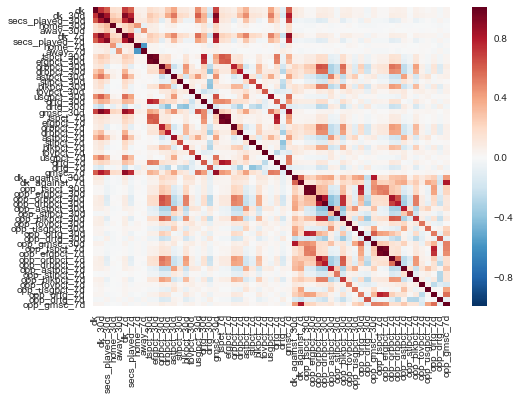

In [5]:
#look at correlations
sns.heatmap(training.corr());
plt.show()

In [6]:
#Basic Linear Model
lm = linear_model.LinearRegression()
ridge_lm = linear_model.Ridge(alpha=0.5)
lasso_lm = linear_model.Lasso(alpha = 0.1)
rfreg = RandomForestRegressor()

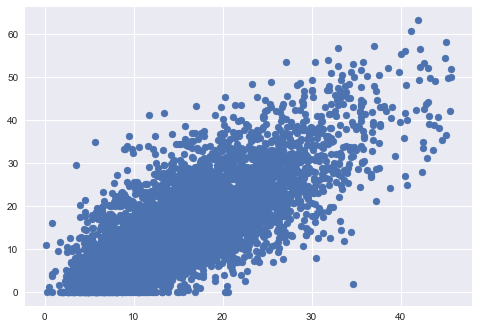

In [7]:
lm_model = training_utils.model_bakeoff(model=lm, 
              df=training, 
              dependent_var="dk",
              test_size=0.3)

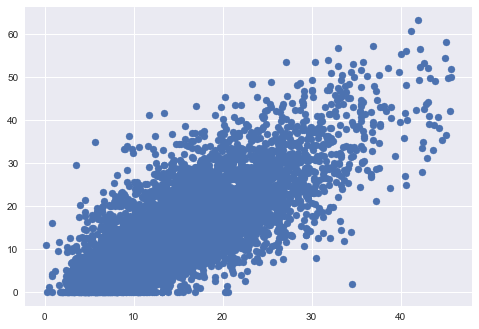

In [8]:
ridge_model = training_utils.model_bakeoff(model=ridge_lm, 
              df=training, 
              dependent_var="dk",
              test_size=0.3)

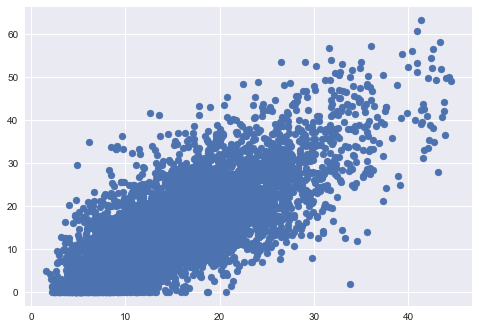

In [9]:
lasso_model = training_utils.model_bakeoff(model=lasso_lm, 
              df=training, 
              dependent_var="dk",
              test_size=0.3)

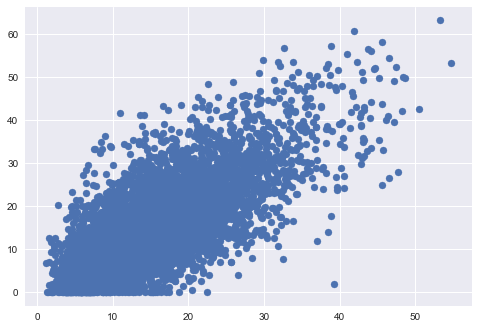

In [10]:
rf_model = training_utils.model_bakeoff(model=rfreg, 
              df=training, 
              dependent_var="dk",
              test_size=0.3)

In [11]:
pd.to_pickle(obj=ridge_model['model'], path="../dk_prod/model.pkl")

ModuleNotFoundError: No module named 'google.cloud'